Consider a *cycle*

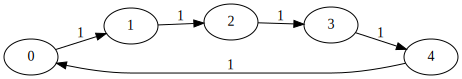

In [11]:
import numpy as np
import numpy.linalg as npl
from graphviz import Digraph 

def cycle(n=5,labels=None):
    if labels==None:
        labels= n*[1]
    cyc = Digraph()
    cyc.attr(rankdir='LR')
    I = list(range(n))

    for i in I:
        cyc.node(f"{i}")

    for i in I:
        cyc.edge(f"{i}",f"{np.mod(i+1,n)}",f"{labels[i]}")

    return cyc
    
cycle()

What is the corresponding matrix $P$?

Well, we can represent the a graph by a dictionary whose keys are pairs `(a,b)` and whose value is the probability of the corresponding state transition.

In [7]:
cd = { (n,(n+1) % 5):1 for n in range(5) }
cd

{(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 0): 1}

In [8]:
def lookup(pair,dict):
    if pair in dict.keys():
        return dict[pair]
    else:
        return 0

def mat(dict):
    return np.array([[ lookup((i,j),dict) for j in range(5)] for i in range(5)])

M=mat(cd)

In [ ]:
import numpy.linalg as npl
e_vals, e_vects = npl.eig(M)
e_vals

Notice that every eigenvalue of the matrix `M` is 0. In particular, the conclusion of the *Frobenius-Perron Theorem* does not hold for `M`.

Adding an extra edge `4 -> 4` fixes the problem!

In [3]:
acd = { (n,(n+1) % 5):1 for n in range(5) }
acd[(4,4)] = .5
acd[(4,0)]= .5
acd

{(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 0): 0.5, (4, 4): 0.5}

In [9]:
Ma=mat(acd)
Ma

array([[0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0.5, 0. , 0. , 0. , 0.5]])

In [12]:
ae_vals,ae_vecs = npl.eig(Ma)
ae_vals

array([ 1.        +0.j        ,  0.37103484+0.80377194j,
        0.37103484-0.80377194j, -0.62103484+0.50229651j,
       -0.62103484-0.50229651j])

In [14]:
[ float(abs(x)) for x in ae_vals ]

[0.9999999999999989,
 0.8852774620837582,
 0.8852774620837582,
 0.7987402949603679,
 0.7987402949603679]